In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/synergy_logistics_database.csv', index_col='register_id')
display(df)

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


In [65]:
y = []
[y.append([f'Germany - {pais_destino}',df[(df['origin'] == 'Germany') & (df['destination'] == pais_destino)].destination.count()]) for pais_destino in df['destination'].unique()]
print(y)

[['Germany - China', 328], ['Germany - USA', 236], ['Germany - South Korea', 144], ['Germany - Spain', 0], ['Germany - Italy', 130], ['Germany - Japan', 0], ['Germany - Germany', 0], ['Germany - Mexico', 231], ['Germany - Brazil', 85], ['Germany - France', 299], ['Germany - Switzerland', 0], ['Germany - United Kingdom', 52], ['Germany - Croatia', 0], ['Germany - Ireland', 0], ['Germany - Belgium', 0], ['Germany - Argentina', 0], ['Germany - Singapore', 0], ['Germany - Canada', 93], ['Germany - Netherlands', 0], ['Germany - Belorussia', 0], ['Germany - Turkey', 0], ['Germany - India', 30], ['Germany - Vietnam', 0], ['Germany - Russia', 0], ['Germany - United Arab Emirates', 0], ['Germany - Thailand', 0], ['Germany - Philippines', 0], ['Germany - Peru', 0], ['Germany - Austria', 0], ['Germany - New Zealand', 0], ['Germany - Rusia', 0], ['Germany - Slovakia', 0], ['Germany - Malaysia', 0], ['Germany - Poland', 36]]


In [83]:
def rutas(pais_origen):
    y = []
    [y.append(df[(df['origin'] == pais_origen) & (df['destination'] == pais_destino)].destination.count()) for pais_destino in df['destination'].unique()]
    return y

In [84]:
y = []
final = []
for pais_origen in df['origin'].unique():
    y = rutas(pais_origen=pais_origen)
    final.append(y)
print(final)

[[196, 140, 62, 15, 0, 0, 54, 385, 306, 0, 21, 0, 0, 0, 0, 0, 43, 273, 0, 0, 0, 8, 0, 68, 76, 55, 0, 0, 0, 0, 0, 0, 0, 0], [328, 236, 144, 0, 130, 0, 0, 231, 85, 299, 0, 52, 0, 0, 0, 0, 0, 93, 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36], [0, 126, 189, 250, 0, 343, 142, 351, 60, 0, 0, 0, 0, 0, 95, 143, 55, 0, 0, 0, 0, 0, 0, 0, 114, 200, 0, 0, 0, 0, 204, 0, 0, 0], [0, 58, 0, 75, 0, 0, 109, 28, 0, 48, 74, 50, 30, 25, 0, 0, 30, 28, 19, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 58], [79, 0, 0, 0, 0, 22, 58, 194, 101, 0, 0, 0, 0, 0, 211, 139, 75, 217, 436, 0, 0, 57, 0, 0, 142, 109, 0, 0, 0, 0, 0, 0, 0, 0], [130, 0, 20, 0, 0, 28, 120, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 110, 219, 80, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [94, 77, 0, 0, 0, 294, 29, 162, 91, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 497, 0, 51, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 44, 24, 23, 239, 0, 0, 0, 0, 437, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [72, 103, 0, 116, 23, 0, 195, 0, 0, 0, 0,

In [90]:
df_test = pd.DataFrame(final, columns=df['destination'].unique(), index=df['origin'].unique())
df_test = df_test.transpose()
display(df_test)

,Japan,Germany,China,Italy,USA,Russia,South Korea,Netherlands,France,Canada,...,United Kingdom,Australia,Brazil,Switzerland,Mexico,Austria,Singapore,Vietnam,Malaysia,United Arab Emirates
China,196,328,0,0,79,130,94,0,72,103,...,0,0,195,0,100,0,23,0,0,0
USA,140,236,126,58,0,0,77,0,103,161,...,122,0,46,0,228,48,106,0,0,0
South Korea,62,144,189,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Spain,15,0,250,75,0,0,0,0,116,0,...,176,0,0,0,0,0,0,0,0,0
Italy,0,130,0,0,0,0,0,0,23,0,...,100,0,0,45,0,98,0,0,0,0
Japan,0,0,343,0,22,28,294,0,0,83,...,0,102,0,0,135,0,46,0,0,0
Germany,54,0,142,109,58,120,29,44,195,0,...,0,0,6,71,34,66,0,0,0,0
Mexico,385,231,351,28,194,0,162,24,0,261,...,0,51,108,0,0,0,0,0,0,0
Brazil,306,85,60,0,101,0,91,23,0,19,...,0,112,0,0,81,0,0,0,0,0
France,0,299,0,48,0,36,0,239,0,0,...,107,0,0,60,0,32,0,0,0,0


In [97]:
df_test.sum().sort_values(ascending = False)

China                   2272
USA                     1840
Japan                   1702
Germany                 1664
South Korea             1295
Mexico                  1138
France                  1088
Australia                965
United Kingdom           929
Russia                   808
Netherlands              796
Canada                   650
Italy                    648
India                    565
Singapore                537
Brazil                   515
Spain                    478
Austria                  437
Switzerland              249
Belgium                  243
Malaysia                 199
United Arab Emirates      20
Vietnam                   18
dtype: int64

<AxesSubplot:>

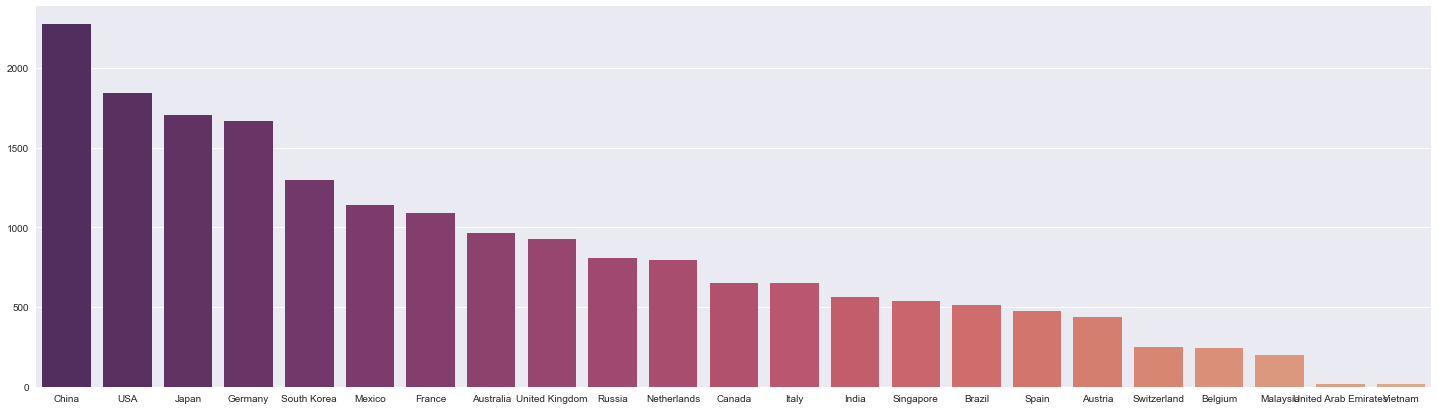

In [100]:
plt.style.use('seaborn')
plt.figure(figsize=(25,7))
sns.barplot(x = df_test.sum().sort_values(ascending = False).index, y = df_test.sum().sort_values(ascending = False), palette='flare_r')
